<a href="https://colab.research.google.com/github/machiwao/CCDEPLRL_EXERCISES_COM222/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [342]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk

from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [461]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [462]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [463]:

dataset['rating'].value_counts()

,count
rating,
1,299
5,249
4,249
3,123
2,81


In [464]:
# change rating of 3-5 to 1 and 1-2 to 0
dataset['rating'] = dataset['rating'].apply(lambda x: 1 if x >= 3 else 0)

In [465]:
dataset['rating'].value_counts()

,count
rating,
1,621
0,380


In [466]:
dataset['review'] = dataset['review'].str.lower()
dataset['review'] = dataset['review'].str.replace('[^a-zA-Z]', ' ')
dataset['review'] = dataset['review'].str.replace('http\S+|www.\S+', '', case=False)
dataset['review'] = dataset['review'].str.replace(r'\d+', '')
dataset['review'] = dataset['review'].str.replace(r'[^\w\s]+', '')
dataset['review'] = dataset['review'].str.strip()
dataset['review'] = dataset['review'].str.replace(r'\s+', ' ')
dataset['review'] = dataset['review'].str.replace(r'^\s+', '')
dataset['review'] = dataset['review'].str.replace(r'\s+$', '')

In [467]:
filipino_stopwords = set([
        'akin', 'aking', 'ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano',
        'anumang', 'apat', 'at', 'atin', 'ating', 'ay', 'ba', 'bababa', 'bago',
        'bakit', 'bawat', 'bilang', 'dahil', 'dalawa', 'dapat', 'din', 'dito',
        'doon', 'eh', 'gagawin', 'gayunman', 'ginagawa', 'ginawa', 'ginawang',
        'gumawa', 'gusto', 'ha', 'habang', 'hanggang', 'hindi', 'huwag', 'hoy',
        'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan',
        'inyong', 'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyang','iyong', 'ka',
        'kahit', 'kailangan', 'kailanman', 'kami', 'kanila', 'kanilang',
        'kanino', 'kanya', 'kanyang', 'kapag', 'kapwa', 'karamihan',
        'katiyakan', 'katulad', 'kaya', 'kaysa', 'ko', 'kong', 'kulang',
        'kumuha', 'kung', 'laban', 'lahat', 'lamang', 'likod', 'lima', 'maaari',
        'maaaring', 'maging', 'mahusay', 'makita', 'marami', 'marapat',
        'masyado', 'may', 'mayroon', 'mga', 'minsan', 'mismo', 'mula', 'muli', 'na',
        'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'namin', 'nang',
        'napaka', 'narito', 'nasaan', 'ng', 'ngayon', 'ngunit', 'ni', 'nila', 'nilang',
        'nito', 'niya', 'niyang', 'noon', 'o', 'pa', 'paano', 'pababa',
        'paggawa', 'pagitan', 'pagkakaroon', 'pagkatapos', 'pala', 'palabas',
        'pamamagitan', 'panahon', 'pangalawa', 'para', 'paraan', 'pareho',
        'pataas', 'pero', 'po', 'pumunta', 'pumupunta', 'sa', 'saan', 'sabi',
        'sabihin', 'sarili', 'sila', 'sino', 'siya',
        'tatlo', 'tayo', 'tulad', 'tungkol', 'una', 'walang', 'yan', 'yung', 'username'
    ])

english_stopwords = set(stopwords.words('english'))
combined_stopwords = filipino_stopwords.union(english_stopwords)

dataset['review'] = dataset['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (combined_stopwords)]))

In [468]:
lemmatizer = WordNetLemmatizer()
dataset['review'] = dataset['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [469]:
sentences = dataset['review'].tolist()
labels = dataset['rating'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [470]:
vocab_size = 4000
embedding_dim = 1024
max_length = 95
trunc_type='post'
padding_type='pre'
oov_tok = ""

## 1. Tokenize the data

In [471]:
# answer here
# Tokenize the data
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [472]:
len(word_index)

2949

## 2. Sequence the data

In [473]:
# answer here
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

## 3. Pad the data

In [474]:
# answer here
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## 4. Train a sentiment model

In [475]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience = 40,
    restore_best_weights=True,
    verbose=1,
    start_from_epoch=5,
    min_delta=0.0001,
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Reduce LR by half
    patience=20,        # Wait 3 epochs before reducing
    min_lr=1e-7,       # Don't go below this
    min_delta=0.001,
    verbose=1
)

In [476]:
# answer here
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
initial_learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_32     │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [477]:
num_epochs = 1000
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final), callbacks=[early_stop, reduce_lr])

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6215 - loss: 0.6562 - val_accuracy: 0.3234 - val_loss: 0.9532 - learning_rate: 1.0000e-04
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7025 - loss: 0.6130 - val_accuracy: 0.3234 - val_loss: 0.8916 - learning_rate: 1.0000e-04
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6770 - loss: 0.6308 - val_accuracy: 0.3234 - val_loss: 0.9396 - learning_rate: 1.0000e-04
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7016 - loss: 0.6105 - val_accuracy: 0.3234 - val_loss: 0.8815 - learning_rate: 1.0000e-04
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7100 - loss: 0.6028 - val_accuracy: 0.3234 - val_loss: 0.9109 - learning_rate: 1.0000e-04
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7122 - loss: 0.5982 - val_accuracy: 0.3234 - val_loss: 0.8814 - learning_rate: 1.0000e-04
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

## Get files for visualing the network

In [478]:
# answer here
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(4000, 1024)


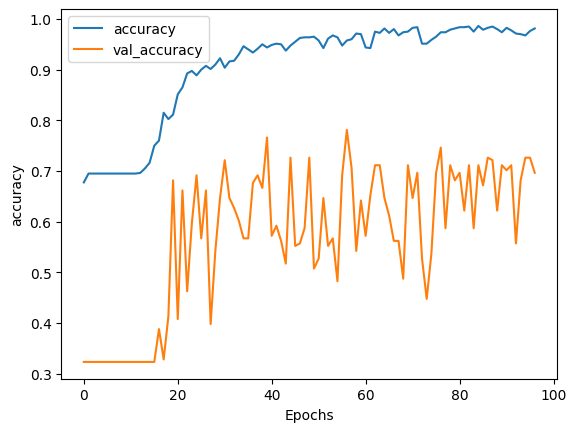

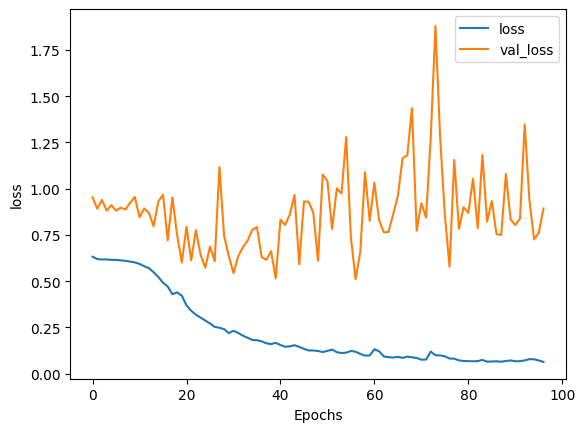

In [479]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [480]:
# Display Classification report
from sklearn.metrics import classification_report
print(classification_report(testing_labels_final, np.round(model.predict(testing_padded))))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       136
           1       0.64      0.72      0.68        65

    accuracy                           0.78       201
   macro avg       0.75      0.77      0.76       201
weighted avg       0.79      0.78      0.78       201



## 5. Predict sentiment with new reviews

In [481]:
# answer here
# Use the model to predict a review
fake_reviews = ['I love the product potangina. The best products by this seller. Well ang condition and mabait ang driver',
                'Okay na. Di ko pa sinusubukan but I think maayos naman siya',
                'Sulit bilhin ang product. Will buy again po sa seller shet',
                'Bogus seller, bogus driver. Nakakayamot kayo mga bobo. Hindi pa ma-contact yung seller. Tinakbuhan ako ng driver',
                'sakto lang',
                'ganda ng product kaso pangit ng seller',]

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

['I love the product potangina. The best products by this seller. Well ang condition and mabait ang driver', 'Okay na. Di ko pa sinusubukan but I think maayos naman siya', 'Sulit bilhin ang product. Will buy again po sa seller shet', 'Bogus seller, bogus driver. Nakakayamot kayo mga bobo. Hindi pa ma-contact yung seller. Tinakbuhan ako ng driver', 'sakto lang', 'ganda ng product kaso pangit ng seller']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
I love the product potangina. The best products by this seller. Well ang condition and mabait ang driver
[0.9572944]


Okay na. Di ko pa sinusubukan but I think maayos naman siya
[0.50245005]


Sulit bilhin ang product. Will buy again po sa seller shet
[0.83917546]


Bogus seller, bogus driver. Nakakayamot kayo mga bobo. Hindi pa ma-contact yung seller. Tinakbuhan ako ng driver
[0.10006586]


sakto lang
[0.49173954]


ganda ng product kaso pangit ng seller
[0.6372509]


